<a href="https://colab.research.google.com/github/antreev-brar/ML-projects/blob/master/textclassifier_encoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly
import tensorflow as tf


     |████████████████████████████████| 518.5MB 29kB/s 
     |████████████████████████████████| 3.0MB 46.3MB/s 
     |████████████████████████████████| 460kB 45.9MB/s 


In [2]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar
import numpy as np
print (tf.__version__)

2.2.0-dev20200415


In [3]:
(train_data , test_data) ,  info = tfds.load(
    
        'imdb_reviews/subwords8k', 
        split = (tfds.Split.TRAIN,tfds.Split.TEST),
        as_supervised = True ,
        with_info=True
)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUMM4W0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUMM4W0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUMM4W0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size : {}'.format(encoder.vocab_size))

Vocabulary size : 8185


In [6]:
sample_string = 'hello tensorflow'

encoded_string = encoder.encode(sample_string)
print('encoded string is :{}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('original string is :"{}"'.format(original_string))

assert original_string == sample_string

encoded string is :[3618, 222, 943, 2327, 2934]
original string is :"hello tensorflow"


In [7]:
for ts in encoded_string :
  print('{} ----> {}'.format(ts , encoder.decode([ts])))

3618 ----> hell
222 ----> o 
943 ----> ten
2327 ----> sor
2934 ----> flow


In [8]:
for train_example , train_label in train_data.take(1):
  print('encoded text :' , train_example[:10].numpy())
  print('label : ',train_label.numpy())

encoded text : [  62   18   41  604  927   65    3  644 7968   21]
label :  0


In [9]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data.shuffle(BUFFER_SIZE).padded_batch(32, padded_shapes =([None],[]))
)

test_batches = (
    test_data.padded_batch (32 ,padded_shapes =([None],[]))
)

In [11]:
for example_batch , label_batch in train_batches.take(2):
  print("batch shape :", example_batch.shape)
  print("label shape :",label_batch.shape)

batch shape : (32, 1227)
label shape : (32,)
batch shape : (32, 1231)
label shape : (32,)


In [12]:
model = keras.Sequential([
                          keras.layers.Embedding(encoder.vocab_size,16),
                          keras.layers.GlobalAveragePooling1D(),
                          keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss = tf.losses.BinaryCrossentropy(from_logits = True),
    metrics =['accuracy']
)

In [15]:
history = model.fit(
    train_batches,
    epochs=50,
    validation_data = test_batches,
    validation_steps = 30
)

Epoch 1/50
782/782 [==============================] - 7s 10ms/step - loss: 0.6168 - accuracy: 0.5572 - val_loss: 0.6004 - val_accuracy: 0.6021
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 0.5539 - accuracy: 0.6470 - val_loss: 0.5504 - val_accuracy: 0.7375
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.4959 - accuracy: 0.7293 - val_loss: 0.5010 - val_accuracy: 0.7490
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4450 - accuracy: 0.7824 - val_loss: 0.4623 - val_accuracy: 0.7792
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4017 - accuracy: 0.8171 - val_loss: 0.4367 - val_accuracy: 0.8406
Epoch 6/50
782/782 [==============================] - 8s 10ms/step - loss: 0.3680 - accuracy: 0.8424 - val_loss: 0.4086 - val_accuracy: 0.8177
Epoch 7/50
782/782 [==============================] - 8s 10ms/step - loss: 0.3419 - accuracy: 0.8577 - val_loss: 0.3923 - val_accuracy: 0.8615


In [16]:
loss ,accuracy = model.evaluate(test_batches)
print('loss :',loss)
print('accuracy :',accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3556 - accuracy: 0.8737
loss : 0.3555966019630432
accuracy : 0.8736799955368042


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

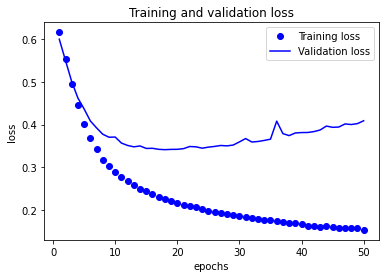

In [19]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1 ,len(acc) +1)

plt.plot(epochs ,loss ,'bo' ,label ='Training loss')

plt.plot(epochs ,val_loss , 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

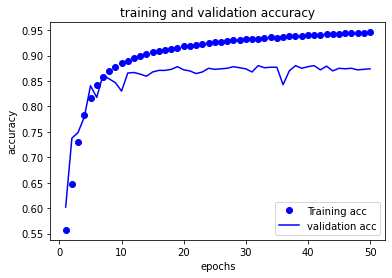

In [20]:
plt.clf()

plt.plot(epochs ,acc , 'bo' ,label ='Training acc')
plt.plot(epochs, val_acc ,'b', label= 'validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

plt.show()
